In [3]:
#!/usr/bin/env python
#<examples/doc_basic.py>
from lmfit import minimize, Parameters, Parameter, report_fit
import numpy as np

# create data to be fitted
x = np.linspace(0, 15, 301)
data = (5. * np.sin(2 * x - 0.1) * np.exp(-x*x*0.025) +
        np.random.normal(size=len(x), scale=0.2) )

# define objective function: returns the array to be minimized
def fcn2min(params, x, data):
    """ model decaying sine wave, subtract data"""
    amp = params['amp'].value
    shift = params['shift'].value
    omega = params['omega'].value
    decay = params['decay'].value

    model = amp * np.sin(x * omega + shift) * np.exp(-x*x*decay)
    return model - data

# create a set of Parameters
params = Parameters()
params.add('amp',   value= 10,  min=0)
params.add('decay', value= 0.1)
params.add('shift', value= 0.0, min=-np.pi/2., max=np.pi/2)
params.add('omega', value= 3.0)


:0: FutureWarning: IPython widgets are experimental and may change in the future.


[[Variables]]
    amp:     4.99274464 +/- 0.041216 (0.83%) (init= 4.992745)
    decay:   0.02478477 +/- 0.000468 (1.89%) (init= 0.02478478)
    omega:   1.99650913 +/- 0.003378 (0.17%) (init= 1.996509)
    shift:  -0.08927343 +/- 0.010634 (11.91%) (init=-0.08927343)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, decay)                =  0.584 


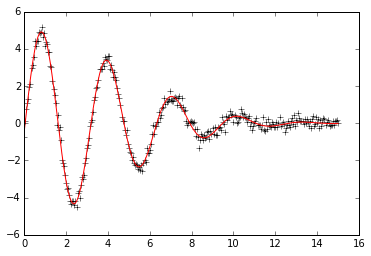

In [6]:
# do fit, here with leastsq model
result = minimize(fcn2min, params, args=(x, data))

# calculate final result
final = data + result.residual

# write error report
report_fit(params)

# try to plot results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, data, 'k+')
plt.plot(x, final, 'r')
plt.show()

#<end of examples/doc_basic.py>